Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment.zip (Unzipped Files)/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment.zip (Unzipped Files)/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
num_classes=9

In [ ]:
cancer_images_dict = {
    'actinic keratosis': list(data_dir_train.glob('actinic keratosis/*')),
    'basal cell carcinoma': list(data_dir_train.glob('basal cell carcinoma/*')),
    'dermatofibroma': list(data_dir_train.glob('dandelion/*')),
    'melanoma': list(data_dir_train.glob('melanoma/*')),
    'nevus': list(data_dir_train.glob('nevus/*')),
    'pigmented benign keratosis': list(data_dir_train.glob('pigmented benign keratosis/*')),
    'seborrheic keratosis': list(data_dir_train.glob('seborrheic keratosis/*')),
    'squamous cell carcinoma': list(data_dir_train.glob('squamous cell carcinoma/*')),
    'vascular lesion': list(data_dir_train.glob('vascular lesion/*')),
}

In [ ]:
cancer_labels_dict = {
    'actinic keratosis': 0,
    'basal cell carcinoma': 1,
    'dermatofibroma': 2,
    'melanoma': 3,
    'nevus': 4,
    'pigmented benign keratosis': 5,
    'seborrheic keratosis': 6,
    'squamous cell carcinoma': 7,
    'vascular lesion': 8

}

In [ ]:
import cv2
X, y = [], []

for cancer_name, images in cancer_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(cancer_labels_dict[cancer_name])

In [ ]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#normalize the data
X_train = X_train / 255
X_test = X_test / 255


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=20)  

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 1s 19ms/step - loss: 2.0739 - accuracy: 0.2321
Epoch 2/20
54/54 [==============================] - 1s 19ms/step - loss: 1.7330 - accuracy: 0.3353
Epoch 3/20
54/54 [==============================] - 1s 19ms/step - loss: 1.5237 - accuracy: 0.4356
Epoch 4/20
54/54 [==============================] - 1s 19ms/step - loss: 1.3550 - accuracy: 0.5195
Epoch 5/20
54/54 [==============================] - 1s 19ms/step - loss: 1.2143 - accuracy: 0.5534
Epoch 6/20
54/54 [==============================] - 1s 19ms/step - loss: 1.1461 - accuracy: 0.5813
Epoch 7/20
54/54 [==============================] - 1s 19ms/step - loss: 1.0909 - accuracy: 0.6041
Epoch 8/20
54/54 [==============================] - 1s 19ms/step - loss: 1.0078 - accuracy: 0.6268
Epoch 9/20
54/54 [==============================] - 1s 20ms/step - loss: 0.9456 - accuracy: 0.6571
Epoch 10/20
54/54 [==============================] - 1s 19ms/step - loss: 0.8386 - accuracy: 0.6950
Epoch 11/20
54/54 [=

In [ ]:
model.evaluate(X_test,y_test)

 6/14 [===========>..................] - ETA: 0s - loss: 2.7458 - accuracy: 0.4948

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 0s 14ms/step - loss: 2.4048 - accuracy: 0.4942


[2.4047601222991943, 0.49417248368263245]

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# View the summary of all layers
model.summary()

### Train the model

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, epochs=20) 

Epoch 1/20
54/54 [==============================] - 1s 20ms/step - loss: 0.3862 - accuracy: 0.8478
Epoch 2/20
54/54 [==============================] - 1s 19ms/step - loss: 0.3357 - accuracy: 0.8729
Epoch 3/20
54/54 [==============================] - 1s 19ms/step - loss: 0.2832 - accuracy: 0.8927
Epoch 4/20
54/54 [==============================] - 1s 19ms/step - loss: 0.2696 - accuracy: 0.8921
Epoch 5/20
54/54 [==============================] - 1s 19ms/step - loss: 0.3103 - accuracy: 0.8729
Epoch 6/20
54/54 [==============================] - 1s 19ms/step - loss: 0.3365 - accuracy: 0.8647
Epoch 7/20
54/54 [==============================] - 1s 19ms/step - loss: 0.2579 - accuracy: 0.8904
Epoch 8/20
54/54 [==============================] - 1s 19ms/step - loss: 0.2236 - accuracy: 0.9044
Epoch 9/20
54/54 [==============================] - 1s 19ms/step - loss: 0.1983 - accuracy: 0.9143
Epoch 10/20
54/54 [==============================] - 1s 19ms/step - loss: 0.1774 - accuracy: 0.9143
Epoch 11/

### Visualizing training results

In [ ]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 10ms/step - loss: 3.3837 - accuracy: 0.4918


[3.3837101459503174, 0.49184149503707886]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: ignored

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Here we see that while train accuracy is very high (86%), the test accuracy is significantly low (49%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfittinge

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



### Compiling the model

In [ ]:
## Your code goes here

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = ## your training code

### Visualizing the results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [ ]:
predictions = model.predict(X_test)
predictions

array([[1.2342639e-05, 9.8004812e-01, 3.6319858e-14, ..., 1.3874310e-06,
        1.4457341e-04, 2.3445462e-08],
       [3.2558918e-02, 9.6333331e-01, 1.3699689e-12, ..., 7.4390610e-10,
        1.3933057e-07, 2.6163593e-04],
       [1.7073749e-02, 9.7396821e-01, 2.6981640e-14, ..., 4.3623775e-04,
        5.2457829e-03, 1.3294213e-05],
       ...,
       [1.2646912e-17, 3.8900228e-35, 0.0000000e+00, ..., 3.5203053e-17,
        1.9976034e-37, 2.1640381e-31],
       [1.1016469e-02, 5.9379748e-26, 0.0000000e+00, ..., 7.4365031e-19,
        7.0627148e-27, 1.2564999e-31],
       [1.6517031e-07, 1.5293912e-06, 7.6763038e-16, ..., 7.9909917e-08,
        3.2585589e-08, 4.8592949e-01]], dtype=float32)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

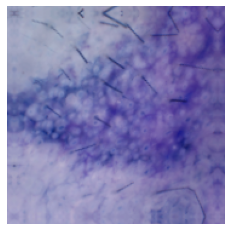

In [ ]:
#newly generated score
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 9

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=20)   

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 2s 23ms/step - loss: 2.0627 - accuracy: 0.2606
Epoch 2/20
54/54 [==============================] - 1s 23ms/step - loss: 1.6147 - accuracy: 0.4023
Epoch 3/20
54/54 [==============================] - 1s 23ms/step - loss: 1.4222 - accuracy: 0.4729
Epoch 4/20
54/54 [==============================] - 1s 22ms/step - loss: 1.3141 - accuracy: 0.5335
Epoch 5/20
54/54 [==============================] - 1s 22ms/step - loss: 1.2530 - accuracy: 0.5364
Epoch 6/20
54/54 [==============================] - 1s 22ms/step - loss: 1.1767 - accuracy: 0.5633
Epoch 7/20
54/54 [==============================] - 1s 22ms/step - loss: 1.1864 - accuracy: 0.5662
Epoch 8/20
54/54 [==============================] - 1s 22ms/step - loss: 1.1461 - accuracy: 0.5773
Epoch 9/20
54/54 [==============================] - 1s 22ms/step - loss: 1.1098 - accuracy: 0.5883
Epoch 10/20
54/54 [==============================] - 1s 23ms/step - loss: 1.1305 - accuracy: 0.5977
Epoch 11/20
54/54 [=

In [ ]:
model.evaluate(X_test,y_test)

 6/14 [===========>..................] - ETA: 0s - loss: 1.4604 - accuracy: 0.5625

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 0s 10ms/step - loss: 1.3120 - accuracy: 0.5897


[1.3120191097259521, 0.5897436141967773]

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="To do"
import Augmentor
for i in num_classes:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

TypeError: ignored

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = # your model fit code

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

